In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
tf.__version__


'2.12.0'

In [4]:
!pip install pillow


In [5]:
tf.config.list_physical_devices('GPU')

[]

In [6]:
batch_size=16

training_datagenarator= ImageDataGenerator(rescale=1./255,horizontal_flip=True,
    vertical_flip=True,shear_range=0.2,
    zoom_range=0.2,width_shift_range=0.2,
    height_shift_range=0.2,validation_split=0.1)
     

In [7]:
train=training_datagenarator.flow_from_directory('/home/tayatu/Downloads/project/Training Data',
                                                target_size=(224, 224),color_mode='rgb',
                                       class_mode='binary', batch_size=batch_size,subset='training')


Found 12360 images belonging to 2 classes.


In [8]:
validation=training_datagenarator.flow_from_directory('/home/tayatu/Downloads/project/Training Data',
                                                target_size=(224, 224),color_mode='rgb',
                                       class_mode='binary', batch_size=batch_size,subset='validation')

Found 1373 images belonging to 2 classes.


In [9]:

# Initializing CNN
cnn=tf.keras.models.Sequential()

# adding first layer
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[224,224,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding second layer
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# adding third layer
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Fully connected layer
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))

# Output layers
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
     

In [10]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 256)       147712    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 256)      0

In [11]:

checkpoint=tf.keras.callbacks.ModelCheckpoint('/home/tayatu/Downloads/project/models/model1.h5',
                                             monitor='val_loss',mode="min",
                                             save_best_only=True)
callbacks=checkpoint

In [12]:
!pip install pillow


In [13]:
from PIL import Image


In [14]:
cnn.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

cnn.fit_generator(train,validation_data=validation,epochs=1,
                  steps_per_epoch=train.samples//batch_size,
                  validation_steps=validation.samples//batch_size,
                  callbacks=callbacks 
                 )

/tmp/ipykernel_154991/2024129360.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  cnn.fit_generator(train,validation_data=validation,epochs=1,
2023-05-02 11:31:30.292484: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 67/772 [=>............................] - ETA: 14:45 - loss: 0.1719 - accuracy: 0.9459

KeyboardInterrupt: 

In [14]:

from tensorflow.keras.models import load_model

cnn=load_model('/home/tayatu/Downloads/project/models/model1.h5')

In [16]:
cnn.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 56, 56, 256)       147712    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 28, 28, 256)      0

In [18]:
pip install matplotlib

  Using cached matplotlib-3.7.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (11.6 MB)
  Using cached contourpy-1.0.7-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (300 kB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached fonttools-4.39.3-py3-none-any.whl (1.0 MB)
  Using cached kiwisolver-1.4.4-cp310-cp310-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (1.6 MB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.3/98.3 kB 707.1 kB/s eta 0:00:00 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import PIL

In [43]:
image_for_testing=r'/home/tayatu/Downloads/project/test_big/002161.jpg'

1/1 [==============================] - 0s 32ms/step


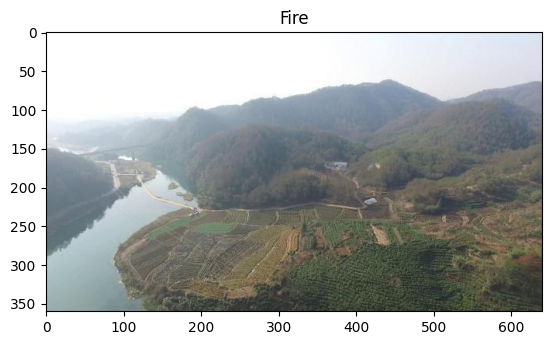

In [44]:
test_image = image.load_img(image_for_testing, target_size=(224,224))
test_image = image.img_to_array(test_image)
test_image = test_image / 255.0
test_image = np.expand_dims(test_image, axis=0)

# Make predictions on test data
y_pred_prob = cnn.predict(test_image)
result = y_pred_prob.argmax()

categories = ['Fire', 'Smoke']

# Show the image with its predicted label
image_show = PIL.Image.open(image_for_testing)
plt.imshow(image_show)

plt.title(categories[result])
plt.show()
     